# 1 - In this activity, you will implement three different ML paradigms: supervised learning, unsupervised learning, and reinforcement learning. This hands-on experience will help you understand the differences between these approaches and how they apply to specific use cases. 

By the end of the activity, you will be able to:

Implement models for each learning paradigm. 

Evaluate each model’s performance on different tasks.

Before starting, make sure you have the necessary libraries installed. You will be using Python along with the following libraries:

NumPy for numerical operations.

Scikit-Learn for supervised and unsupervised learning.

Gym for reinforcement learning environments.

Matplotlib for visualization.

# 1.1 Supervised learning: Predicting house prices
In this task, you will use supervised learning to predict house prices based on features such as square footage, number of bedrooms, and location. You will train a linear regression model using a labeled dataset.

Step-by-step guide:
Step 1: Prepare the dataset
You will use a small dummy dataset of house features and prices.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = np.array([[2000, 3, 1], [1500, 2, 2], [1800, 3, 3], [1200, 2, 1], [2200, 4, 2]])
y = np.array([500000, 350000, 450000, 300000, 550000])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [2]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Step 3: Evaluate the model
Evaluate the model on the test data using mean squared error (MSE) as the evaluation metric.

In [3]:
from sklearn.metrics import mean_squared_error

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 624999999.9999971


# 1.2 Unsupervised learning: Customer segmentation
In this task, you will use unsupervised learning to group customers based on their purchasing behavior. You will implement the k-means clustering algorithm to discover natural groupings in the data.

Prepare the dataset
Create a dataset in which each row represents a customer, and the columns represent the number of purchases, total spending, and product categories purchased

In [4]:
from sklearn.cluster import KMeans
import numpy as np

# Sample customer data: number of purchases, total spending, product categories purchased
X = np.array([[5, 1000, 2], [10, 5000, 5], [2, 500, 1], [8, 3000, 3], [12, 6000, 6]])

In [5]:
# Create and fit the KMeans model
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# Print the cluster centers and labels
print(f"Cluster Centers: {kmeans.cluster_centers_}")
print(f"Labels: {kmeans.labels_}")

Cluster Centers: [[5.0e+00 1.5e+03 2.0e+00]
 [1.1e+01 5.5e+03 5.5e+00]]
Labels: [0 1 0 0 1]


Text(0.5, 1.0, 'Customer Segmentation using K-Means Clustering')

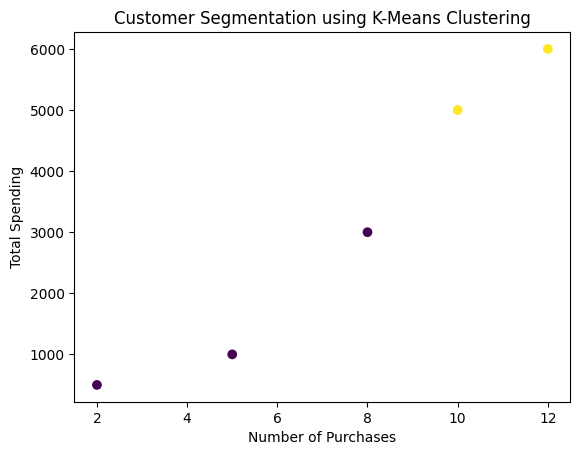

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Number of Purchases')
plt.ylabel('Total Spending')
plt.title('Customer Segmentation using K-Means Clustering')

# 1.3 Reinforcement learning: Training an AI agent to play tic-tac-toe
In this task, you will implement reinforcement learning using the Q-learning algorithm to train an AI agent to play tic-tac-toe. The agent will receive rewards for winning, losing, or drawing a game and will adjust its strategy to maximize its chances of winning.

Set up the environment
Use a basic grid environment in which the agent can place its marks (X or O) on the tic-tac-toe board.

In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Initialize the Q-table
Q = {}

# Define the Tic-Tac-Toe board - Define uma matriz 3x3
def initialize_board():
    return np.zeros((3, 3), dtype=int)

Implement and train with the Q-learning algorithm
Train the agent over multiple games, updating the Q-table based on rewards.

In [22]:
# Função para verificar se um jogador venceu o jogo da velha
def check_win(board, player):
    # Verifica todas as linhas e colunas
    for i in range(3):
        if np.all(board[i, :] == player) or np.all(board[:, i] == player):
            return True
    # Verifica as duas diagonais
    if board[0, 0] == board[1, 1] == board[2, 2] == player or board[0, 2] == board[1, 1] == board[2, 0] == player:
        return True
    return False

# O código abaixo implementa funções auxiliares e o treinamento de um agente de Q-learning para jogar jogo da velha (tic-tac-toe):


# Check for a draw
# 1. check_draw: verifica se o tabuleiro está cheio (empate).
def check_draw(board):
    return not np.any(board == 0)

# Get available actions
# 2. get_available_actions: retorna as posições livres no tabuleiro.
def get_available_actions(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i, j] == 0]

# Choose an action using epsilon-greedy policy
# 3. choose_action: escolhe uma ação usando a política epsilon-greedy (exploração ou melhor ação conhecida).
def choose_action(state, board, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(get_available_actions(board))
    else:
        if state in Q and Q[state]:
            # Choose the action with the maximum Q-value
            return max(Q[state], key=Q[state].get)
        else:
            # No action in Q-table, choose random
            return random.choice(get_available_actions(board))

# Update Q-value
# 4. update_q_value: atualiza o valor Q para um estado-ação usando a equação do Q-learning.
def update_q_value(state, action, reward, next_state, alpha, gamma):
    # Primeiro, encontramos o maior valor Q possível para o próximo estado (next_state).
    # Se esse estado não existir no dicionário Q, usamos o valor padrão 0.
    max_future_q = max(Q.get(next_state, {}).values(), default=0)

    # Em seguida, obtemos o valor Q atual para o estado (state) e ação (action).
    # Se ele não estiver no dicionário Q, consideramos 0 também.
    current_q = Q.get(state, {}).get(action, 0)

    # Agora, calculamos o novo valor Q (new_q).
    # Ele é atualizado conforme a fórmula Q-learning, somando a diferença entre
    # a recompensa recebida e o valor Q atual, multiplicada pela taxa de aprendizagem,
    # e adicionando o valor futuro descontado (max_future_q).
    new_q = current_q + alpha * (reward + gamma * max_future_q - current_q)

    # Por fim, verificamos se o estado ainda não existe no dicionário Q.
    # Se não existir, criamos uma nova chave para armazenar as ações.
    if state not in Q:
        Q[state] = {}
    Q[state][action] = new_q

# Convert board to a tuple (hashable type)
# 5. board_to_tuple: converte o tabuleiro para tupla, tornando-o hashable para uso como chave no dicionário Q.
def board_to_tuple(board):
    return tuple(map(tuple, board))


# Train the agent
# 6. train: executa múltiplos episódios de treinamento, onde o agente joga contra um oponente aleatório, 
# atualizando a Q-table com base nas recompensas recebidas (vitória, derrota ou empate). O histórico de vitórias é registrado para análise posterior.

def train(episodes, alpha=0.1, gamma=0.9, epsilon=0.1):
    # Inicia o histórico de vitórias
    win_history = []
    # Loop principal: repete o processo de jogo 'episodes' vezes
    for episode in range(episodes):
        # Inicializa o tabuleiro como matriz 3x3 (todas posições 0)
        board = initialize_board()
        # Transforma o tabuleiro em tupla para ser usado como chave no dicionário Q
        state = board_to_tuple(board)
        # Define variável para verificar término de jogo e resultado
        done = False
        result = None
        # Enquanto não houver vencedor ou empate
        while not done:
            # Escolhe ação para o agente (linha, coluna) com epsilon-greedy
            action = choose_action(state, board, epsilon)
            # Preenche o tabuleiro com 1 (jogada do agente) nessa posição
            board[action[0], action[1]] = 1
            # Cria nova tupla do tabuleiro para representar o estado resultante
            next_state = board_to_tuple(board)
            # Se o agente vencer, recompensa = 1
            if check_win(board, 1):
                update_q_value(state, action, 1, next_state, alpha, gamma)
                result = 1
                done = True
            # Se deu empate, recompensa = 0.5
            elif check_draw(board):
                update_q_value(state, action, 0.5, next_state, alpha, gamma)
                result = 0
                done = True
            else:
                # O adversário (aleatório) faz jogada: marca -1 na posição escolhida
                opponent_action = random.choice(get_available_actions(board))
                board[opponent_action[0], opponent_action[1]] = -1
                # Atualiza próximo estado após jogada do oponente
                next_state = board_to_tuple(board)
                # Se o oponente vencer, recompensa negativa
                if check_win(board, -1):
                    update_q_value(state, action, -1, next_state, alpha, gamma)
                    result = -1
                    done = True
                # Se deu empate
                elif check_draw(board):
                    update_q_value(state, action, 0.5, next_state, alpha, gamma)
                    result = 0
                    done = True
                else:
                    # Nem ganhou nem perdeu, recompensa zero e o jogo continua
                    update_q_value(state, action, 0, next_state, alpha, gamma)
                # Move para o estado seguinte
            state = next_state
        # Armazena 1 no histórico se houve vitória do agente; caso contrário, 0
        if result == 1:
            win_history.append(1)
        else:
            win_history.append(0)
    return win_history


In [23]:
# Train the agent for 10000 episodes
win_history = train(10000)

In [24]:

# Calculate the moving average of win rate
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

# Set the window size for the moving average
window_size = 100

# Compute the moving average
win_rate = moving_average(win_history, window_size)

# Generate episodes for plotting
episodes = np.arange(window_size, len(win_history) + 1)



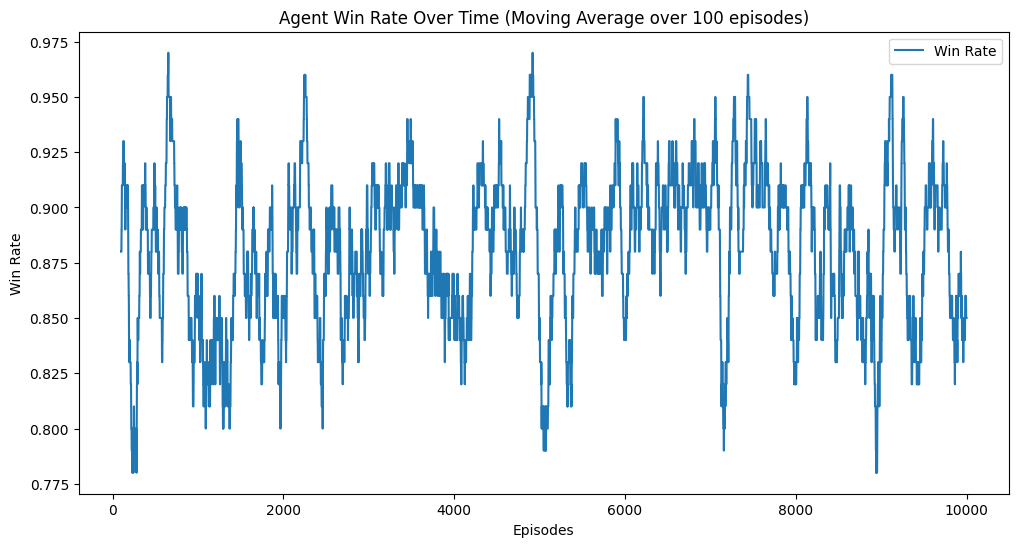

In [25]:

# Plot the win rate over time
plt.figure(figsize=(12,6))
plt.plot(episodes, win_rate, label='Win Rate')
plt.xlabel('Episodes')
plt.ylabel('Win Rate')
plt.title('Agent Win Rate Over Time (Moving Average over {} episodes)'.format(window_size))
plt.legend()
plt.show()

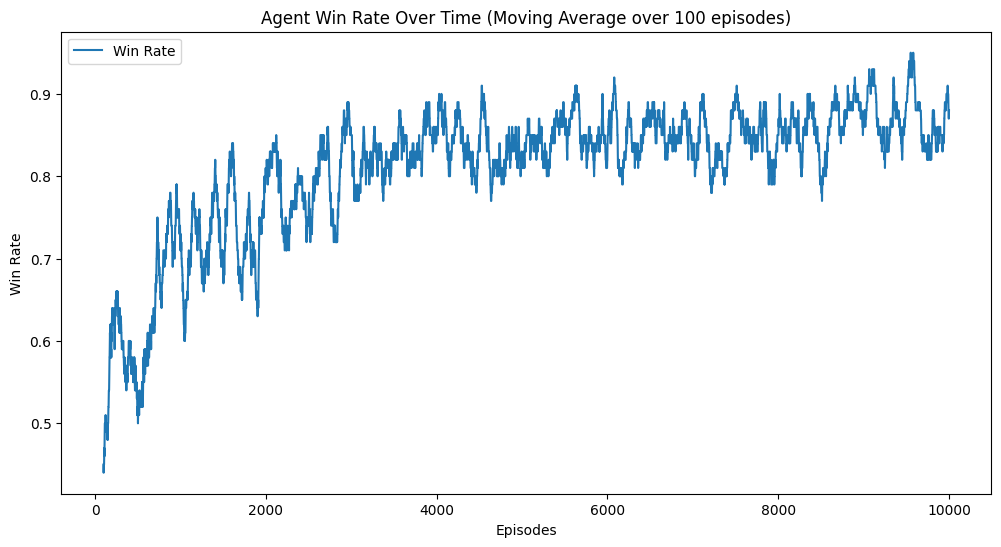

In [17]:
# Check for a win
def check_win(board, player):
    for i in range(3):
        if np.all(board[i, :] == player) or np.all(board[:, i] == player):
            return True
    if board[0, 0] == board[1, 1] == board[2, 2] == player or board[0, 2] == board[1, 1] == board[2, 0] == player:
        return True
    return False

# Check for a draw
def check_draw(board):
    return not np.any(board == 0)

# Get available actions
def get_available_actions(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i, j] == 0]


# Choose an action using epsilon-greedy policy
def choose_action(state, board, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(get_available_actions(board))
    else:
        if state in Q and Q[state]:
            # Choose the action with the maximum Q-value
            return max(Q[state], key=Q[state].get)
        else:
            # No action in Q-table, choose random
            return random.choice(get_available_actions(board))

# Update Q-value
def update_q_value(state, action, reward, next_state, alpha, gamma):
    max_future_q = max(Q.get(next_state, {}).values(), default=0)
    current_q = Q.get(state, {}).get(action, 0)
    new_q = current_q + alpha * (reward + gamma * max_future_q - current_q)
    if state not in Q:
        Q[state] = {}
    Q[state][action] = new_q

    
# Convert board to a tuple (hashable type)
def board_to_tuple(board):
    return tuple(map(tuple, board))

# Train the agent
def train(episodes, alpha=0.1, gamma=0.9, epsilon=0.1):
    win_history = []
    for episode in range(episodes):
        board = initialize_board()
        state = board_to_tuple(board)
        done = False
        result = None  # Initialize result
        while not done:
            action = choose_action(state, board, epsilon)
            board[action[0], action[1]] = 1
            next_state = board_to_tuple(board)
            if check_win(board, 1):
                update_q_value(state, action, 1, next_state, alpha, gamma)
                result = 1  # Agent won
                done = True
            elif check_draw(board):
                update_q_value(state, action, 0.5, next_state, alpha, gamma)
                result = 0  # Draw
                done = True
            else:
                opponent_action = random.choice(get_available_actions(board))
                board[opponent_action[0], opponent_action[1]] = -1
                next_state = board_to_tuple(board)
                if check_win(board, -1):
                    update_q_value(state, action, -1, next_state, alpha, gamma)
                    result = -1  # Agent lost
                    done = True
                elif check_draw(board):
                    update_q_value(state, action, 0.5, next_state, alpha, gamma)
                    result = 0  # Draw
                    done = True
                else:
                    update_q_value(state, action, 0, next_state, alpha, gamma)
            state = next_state
        # Record the result
        if result == 1:
            win_history.append(1)
        else:
            win_history.append(0)
    return win_history

# Train the agent for 10000 episodes
win_history = train(10000)

# Calculate the moving average of win rate
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

# Set the window size for the moving average
window_size = 100

# Compute the moving average
win_rate = moving_average(win_history, window_size)

# Generate episodes for plotting
episodes = np.arange(window_size, len(win_history) + 1)

# Plot the win rate over time
plt.figure(figsize=(12,6))
plt.plot(episodes, win_rate, label='Win Rate')
plt.xlabel('Episodes')
plt.ylabel('Win Rate')
plt.title('Agent Win Rate Over Time (Moving Average over {} episodes)'.format(window_size))
plt.legend()
plt.show()
